# Python For Data Analysis : ESILV 2021/2022

## A project made by Mattéo Berodier and Grégoire Caurier

# Introduction

We decided to work on the QSAR (Quantitative StruCorcture Activity Relationships) dataset. It is a dataset created to study the relationships between chemical structure and biodegradation of molecules. The aim of this dataset is, through 41 variables, to predict and divide in 2 groups the molecules: those which are ready to be biodegraded and those which are not.

Thus, it is a classification work that must be done with this dataset.

We decided to work on Deepnote because we find it to be a better collaborative platform than Google Collab and allows for a nicer presentation but that's just a preference like tastes and colors.

We started by exploring the dataset to find out more for the rest of the challenge. We started with simple commands to see if the data was pretty well uniform and if some cleaning was needed.We continued with data visualization to see if we could find correlations between variables or if some variables were too isolated to have any influence in the final models. Indeed, there are 41 variables, which is not too many either, but it is still not nothing.We then pre-processed the data by doing an ANOVA which allowed us to confirm the variables that will intervene the least in our models and thus save considerably on execution time during the search for hyper parameters. On average the execution time was 5 to 10 minutes (Deepnote stopping the execution at around 10 minutes).

Finally, we have realized several prediction models with the library scikit-learn library. We are satisfied with the good results we found. We have very good scores on a model to build our webapp using Flask.

# Imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
header=['Leading eigenvalue from Laplace matrix',
 'Balaban-like index from Barysz matrix weighted by Sanderson electronegativity',
 'Number of heavy atoms',
 'Frequency of N-N at topological distance 1',
 'Frequency of C-N at topological distance 4',
 'Number of atoms of type ssssC',
 'Number of substituted benzene C(sp2)',
 'Percentage of C atoms',
 'Number of terminal primary C(sp3)',
 'Number of oxygen atoms',
 'Frequency of C-N at topological distance 3',
 'Sum of dssC E-states',
 'Hyper-Wiener-like index (log function) from Burden matrix weighted by mass',
 'Lopping centric index',
 'Spectral moment of order 6 from Laplace matrix',
 'Frequency of C - O at topological distance 3',
 'Mean atomic Sanderson electronegativity (scaled on Carbon atom)',
 'Mean first ionization potential (scaled on Carbon atom)',
 'Number of N hydrazines',
 'Number of nitro groups (aromatic)',
 'Number of CRX3',
 'Normalized spectral positive sum from Burden matrix weighted by polarizability',
 'Number of circuits',
 'Presence/absence of C - Br at topological distance 1',
 'Presence/absence of C - Cl at topological distance 3',
 'Ar2NH / Ar3N / Ar2N-Al / R..N..R',
 'Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index)',
 'Intrinsic state pseudoconnectivity index - type 1d',
 'Presence/absence of C - Br at topological distance 4',
 'Sum of dO E-states',
 'Second Mohar index from Laplace matrix',
 'Number of ring tertiary C(sp3)',
 'R--CX--R',
 'Frequency of C - N at topological distance 2',
 'Number of donor atoms for H-bonds (N and O)',
 'Leading eigenvalue from Burden matrix weighted by mass',
 'Intrinsic state pseudoconnectivity index - type S average',
 'Number of Nitrogen atoms',
 'Spectral moment of order 6 from Burden matrix weighted by mass',
 'Number of esters (aromatic)',
 'Number of halogen atoms',
 'experimental class']

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv',sep=';')

In [4]:
df.columns=header

# Exploring the Data

In [5]:
df.head()

,Leading eigenvalue from Laplace matrix,Balaban-like index from Barysz matrix weighted by Sanderson electronegativity,Number of heavy atoms,Frequency of N-N at topological distance 1,Frequency of C-N at topological distance 4,Number of atoms of type ssssC,Number of substituted benzene C(sp2),Percentage of C atoms,Number of terminal primary C(sp3),Number of oxygen atoms,...,R--CX--R,Frequency of C - N at topological distance 2,Number of donor atoms for H-bonds (N and O),Leading eigenvalue from Burden matrix weighted by mass,Intrinsic state pseudoconnectivity index - type S average,Number of Nitrogen atoms,Spectral moment of order 6 from Burden matrix weighted by mass,Number of esters (aromatic),Number of halogen atoms,experimental class
0,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
1,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
2,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
3,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
4,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,3.351,2.556,0,7.904,0,0,RB


In [6]:
df.shape

(1054, 42)

In [7]:
df.dtypes

Leading eigenvalue from Laplace matrix                                            float64
Balaban-like index from Barysz matrix weighted by Sanderson electronegativity     float64
Number of heavy atoms                                                               int64
Frequency of N-N at topological distance 1                                          int64
Frequency of C-N at topological distance 4                                          int64
Number of atoms of type ssssC                                                       int64
Number of substituted benzene C(sp2)                                                int64
Percentage of C atoms                                                             float64
Number of terminal primary C(sp3)                                                   int64
Number of oxygen atoms                                                              int64
Frequency of C-N at topological distance 3                                          int64
Sum of dss

as we can see, except the target class we only got some numercial variables, it will be easier to plot some graphs to see the correlations even if there is some variables (such as all the 'Presence' ones that can be considering such as categorical variables)

In [8]:
df.dtypes.value_counts()

int64      24
float64    17
object      1
dtype: int64

In [9]:
print(f"Nombre de lignes : {len(df)}")

Nombre de lignes : 1054


In [10]:
print(f"Nombre duplicats : {len(df) - len(df.drop_duplicates())}")

Nombre duplicats : 3


In [11]:
df.isnull().sum()

Leading eigenvalue from Laplace matrix                                            0
Balaban-like index from Barysz matrix weighted by Sanderson electronegativity     0
Number of heavy atoms                                                             0
Frequency of N-N at topological distance 1                                        0
Frequency of C-N at topological distance 4                                        0
Number of atoms of type ssssC                                                     0
Number of substituted benzene C(sp2)                                              0
Percentage of C atoms                                                             0
Number of terminal primary C(sp3)                                                 0
Number of oxygen atoms                                                            0
Frequency of C-N at topological distance 3                                        0
Sum of dssC E-states                                                        

As we can see, the data set is already very well constructed with no missing values in all its columns. This will make our task easier as there is no need for a major cleanup.

In [12]:
df.info

<bound method DataFrame.info of       Leading eigenvalue from Laplace matrix  \
0                                      4.170   
1                                      3.932   
2                                      3.000   
3                                      4.236   
4                                      4.236   
...                                      ...   
1049                                   5.431   
1050                                   5.287   
1051                                   4.869   
1052                                   5.158   
1053                                   5.076   

      Balaban-like index from Barysz matrix weighted by Sanderson electronegativity  \
0                                                2.1144                               
1                                                3.2512                               
2                                                2.7098                               
3                                          

In [13]:
df['experimental class'].value_counts()/len(df)

NRB    0.663188
RB     0.336812
Name: experimental class, dtype: float64

the proportion of "Not Ready Biodegradable" is a little bit much higher than the "Ready Biodegradable"

In [14]:
df2=df.copy()

we make a copy for later.

# Starting Data Viz

In this part, the objective is to identify which variables play an essential role and, on the contrary, which ones may have less influence on the performance of our models.

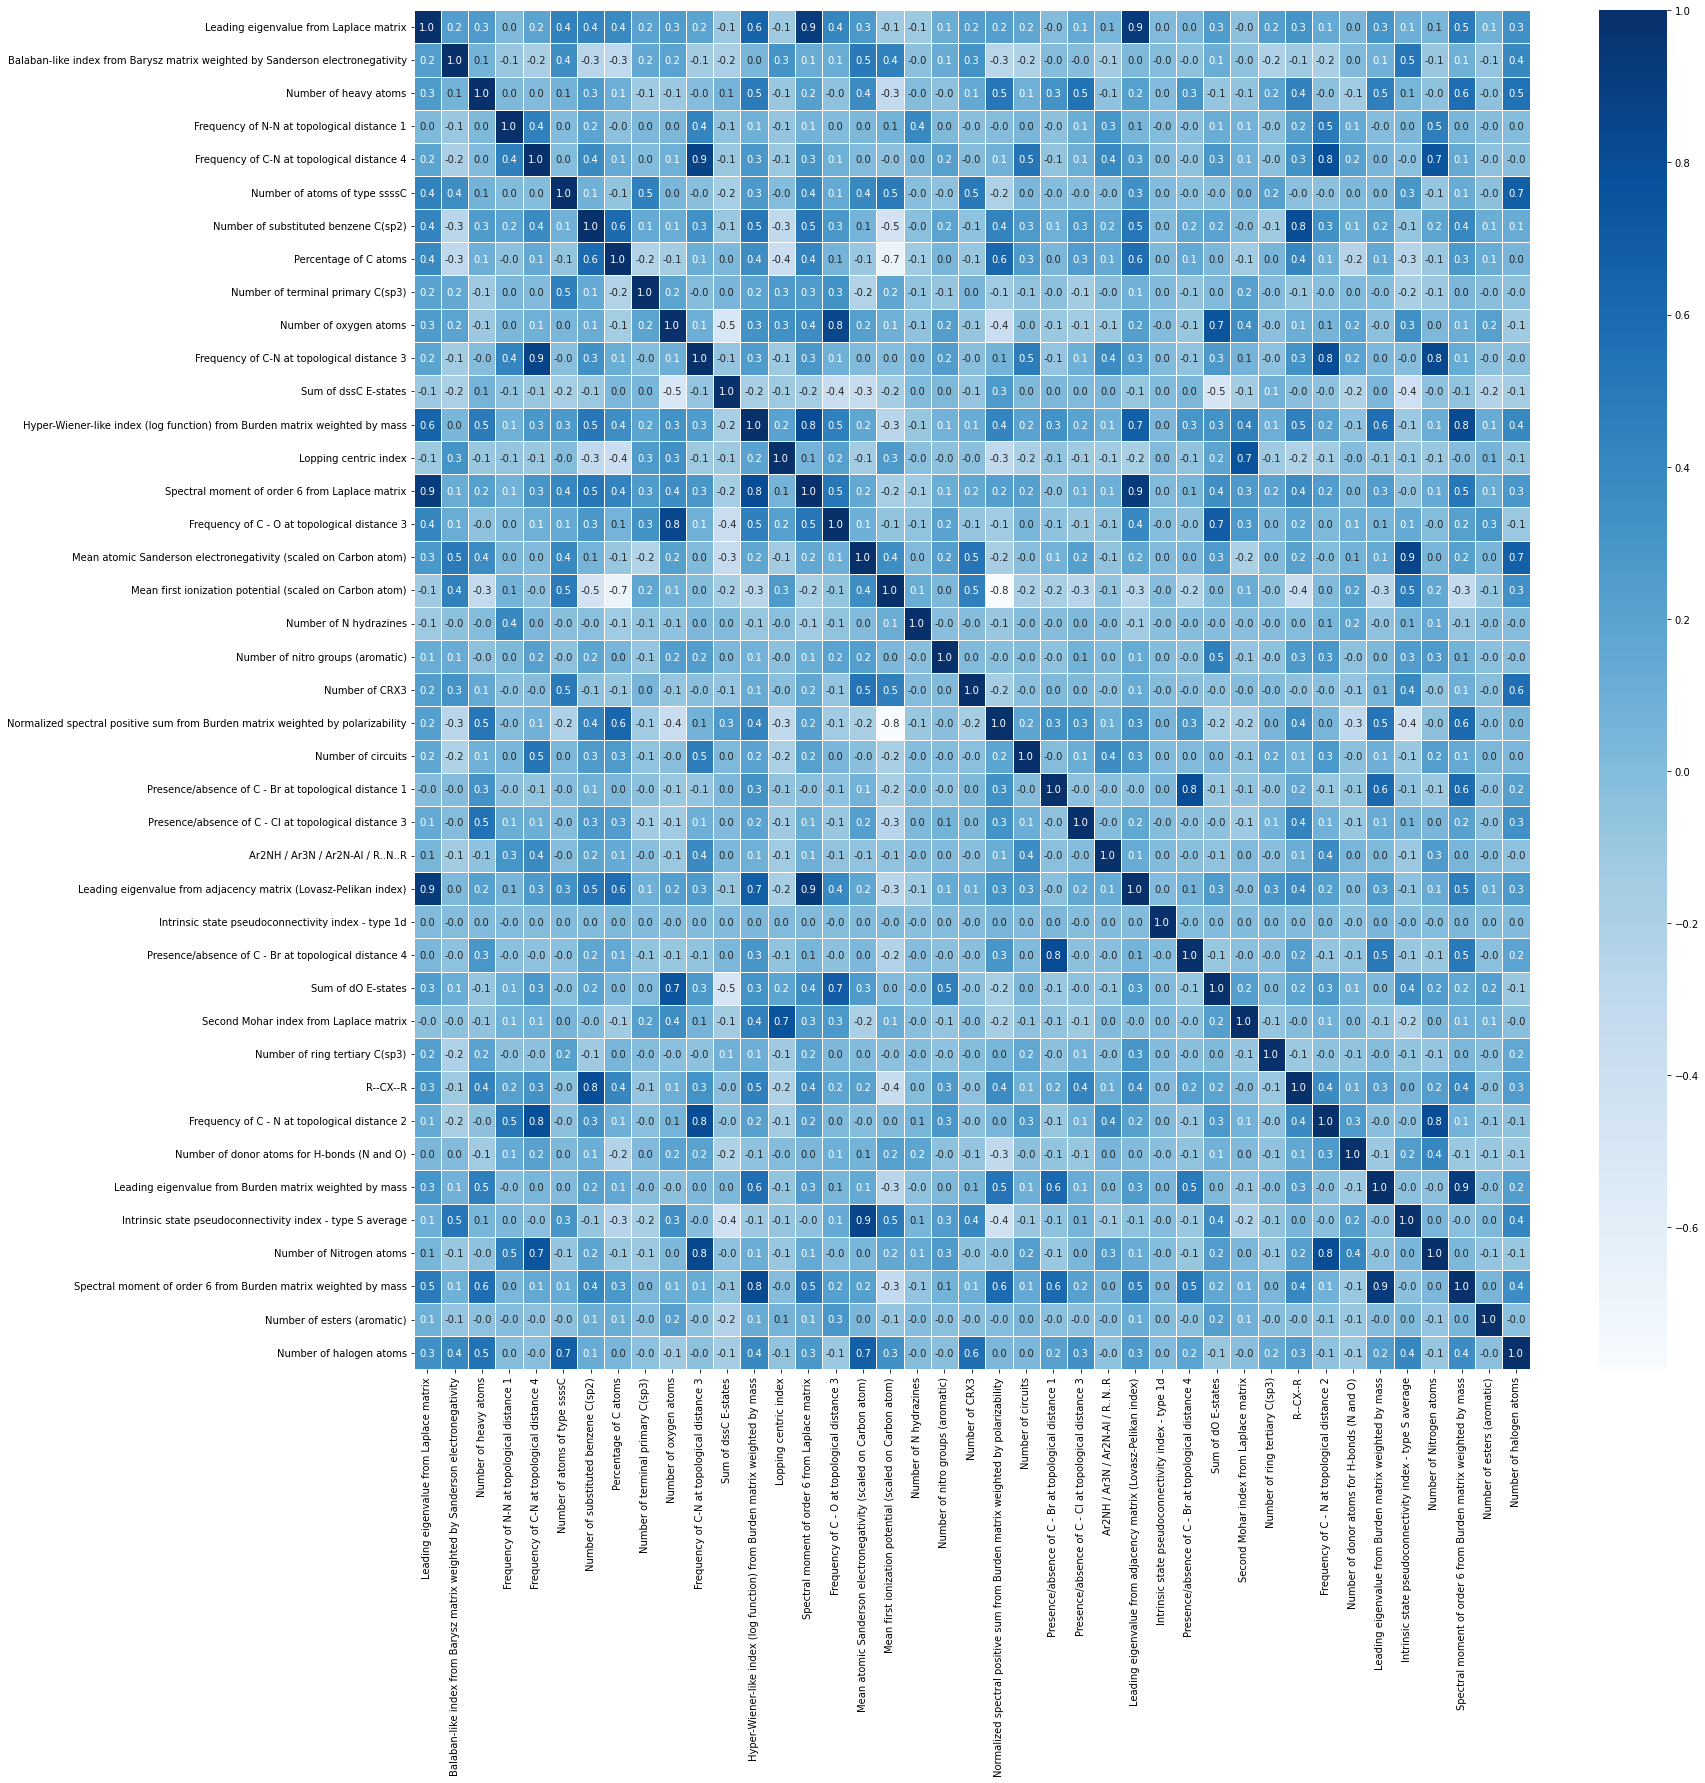

In [15]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="Blues")
plt.show()

As we can see, some variables are highly correlated with each other. It will be necessary to make observations between the variables which are close and which are likely to describe the same thing to see if one is perhaps not necessary to the models. We will create groups to be analyzed afterwardsConversely, some variables are not correlated with any other variable or only very slightly: Ar2NH / Ar3N / Ar2N-Al / R..N..R, Intrinsic state pseudoconnectivity index - type 1d , Number of donor atoms for H-bonds (N and O), Number of N hydrazines

we would have to look at the proportion of 0 in some of those variables since we know that this dataset contains a lot of values equal to 0. A variable that contains a lot of 0's and that is not correlated with any other variable has little chance of influencing the models. Except if the values other than 0 are specific to a class and vice versa

Text(0.5, 0, 'Column Name')

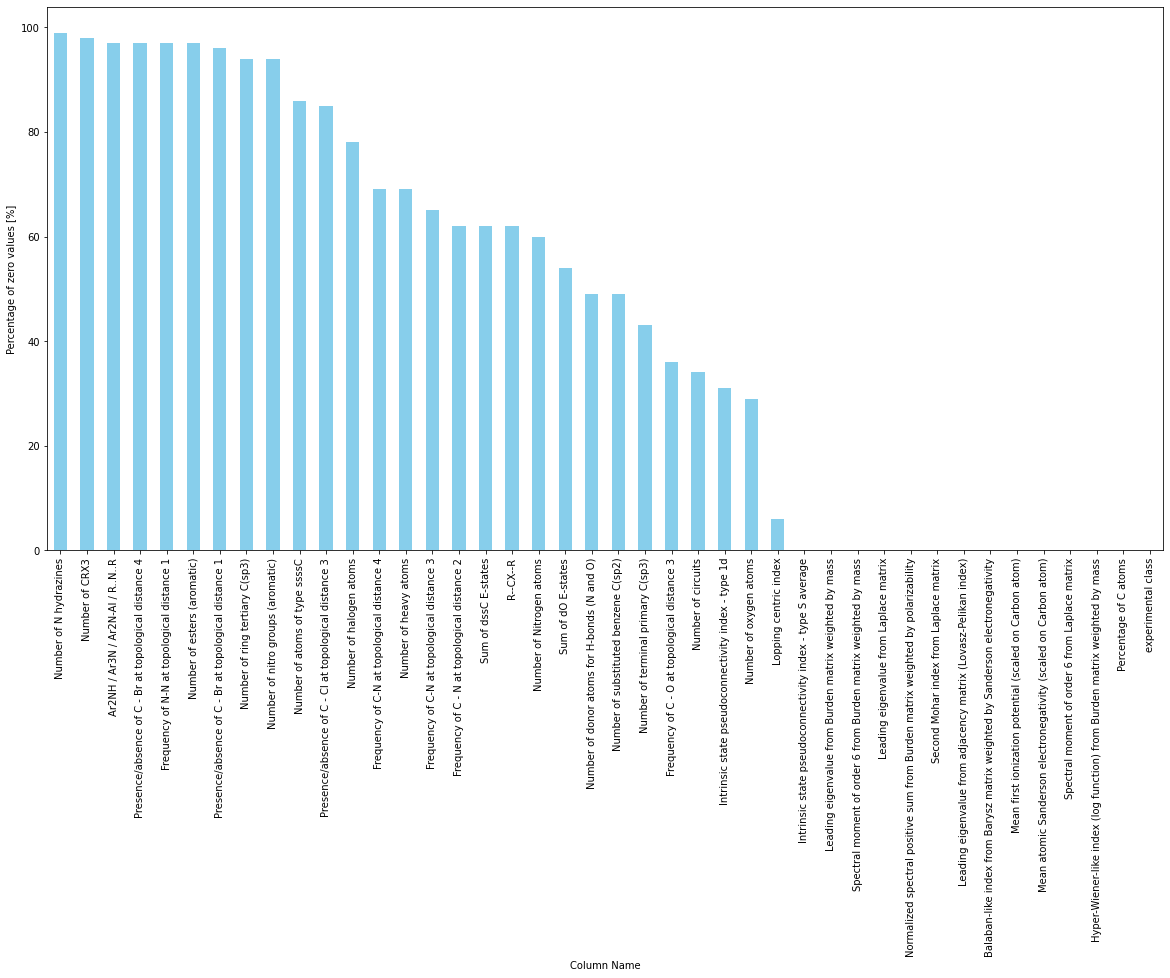

In [16]:
zeros_propertion = [round(sum(df.iloc[:,i] == 0)/len(df),2)*100 for i in range(df.shape[1])]
df_zero = pd.DataFrame(zeros_propertion , index = df.columns).sort_values(by=0, ascending = False)

df_zero.plot(kind = 'bar', legend = False, figsize =(20,10),color='skyblue')
plt.ylabel('Percentage of zero values [%]')
plt.xlabel('Column Name')

As we can see our previous expectations where good for examples 'Number of N hydrazines' seems to be the variable with the most significant numbers of zeroes in the dataset and this variable is highly correlated with no other, if we do an Anova test there is a strong probability that those variables will be eliminated.

## Data viz by group of similar variables

In [17]:

df_ReadyBio=df[df['experimental class']=="RB"]
df_NotReadyBio=df[df['experimental class']=="NRB"]

Here we divide the data into groups of variables that work into the same categories of a molecule such as the presence, the number of certain atoms. It will allow us to see some more correlated parameters.

In [18]:
def Columns_By_Category(dataframe,name):
    res=[]
    for col in dataframe.columns:
        if name.lower() in col.lower():
            res.append(col)
    return res


Columns_Number=Columns_By_Category(df,'number')

Columns_Frequency=Columns_By_Category(df,'frequency')

Columns_Presence=Columns_By_Category(df,'presence')


In [19]:
len(Columns_Number)

14

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

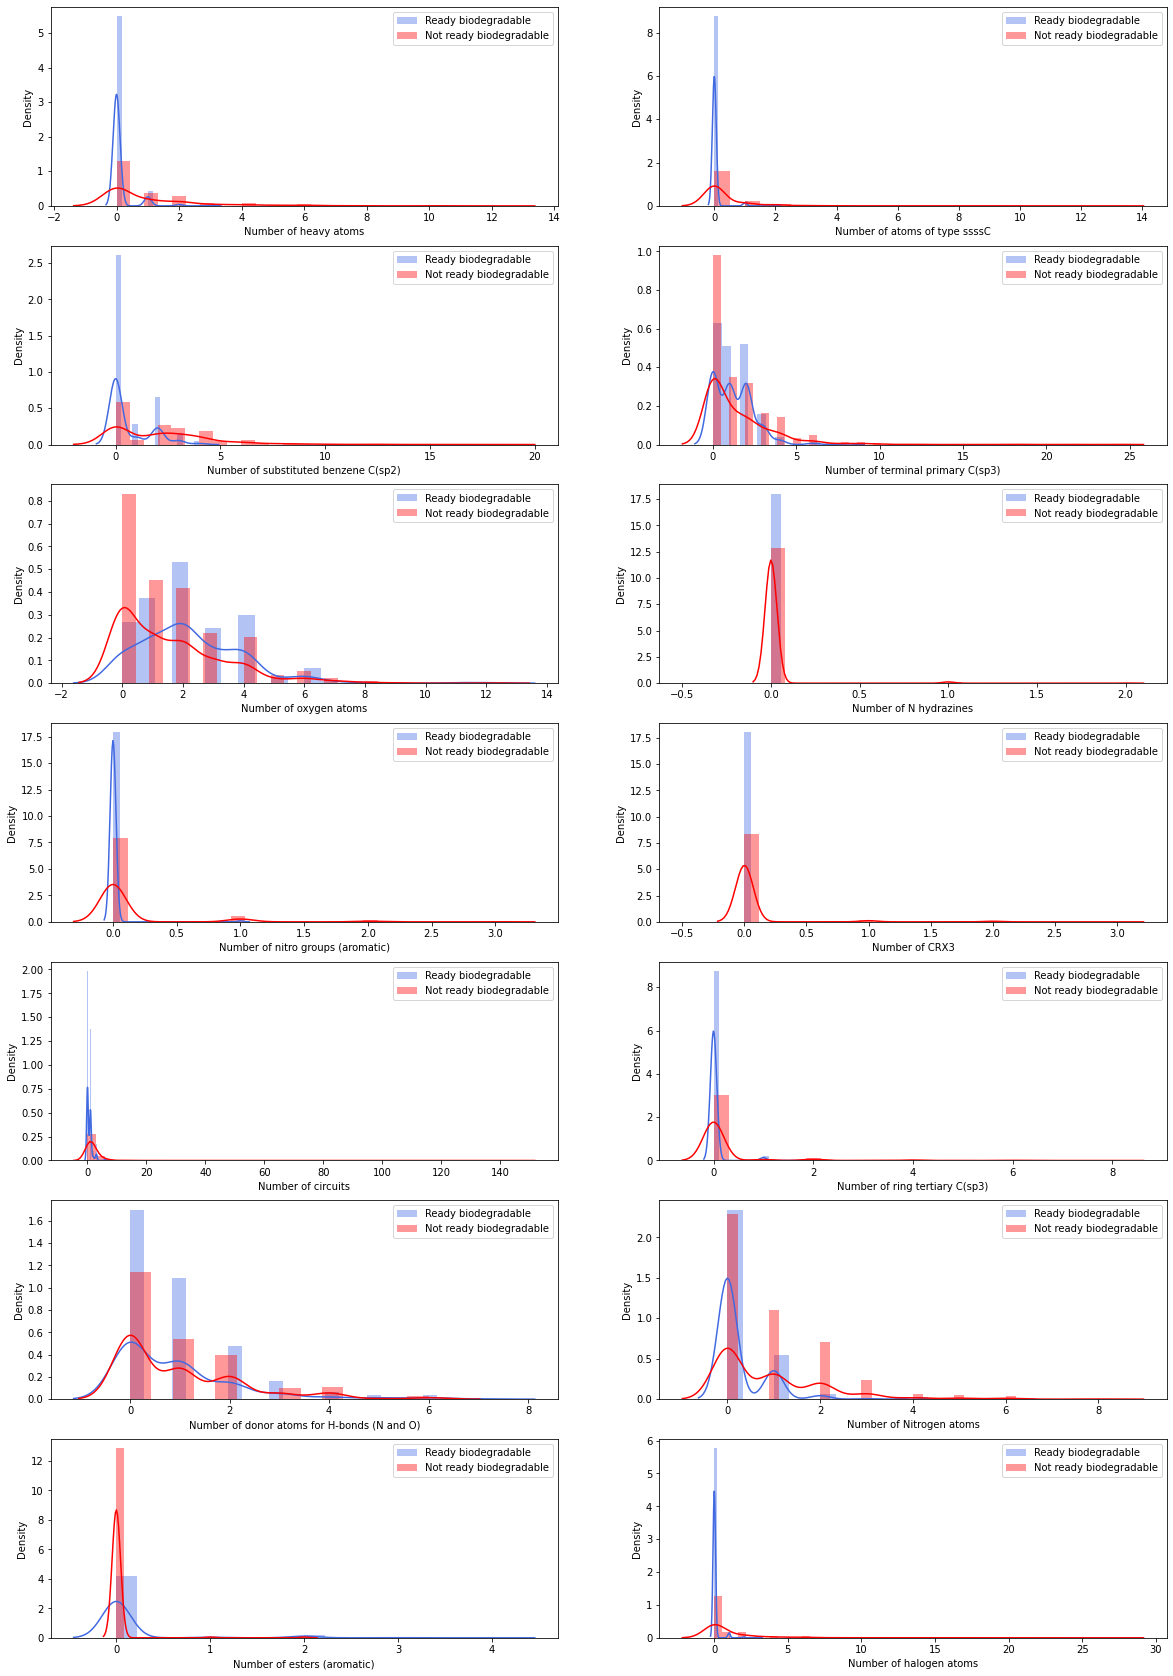

In [20]:
plt.figure(figsize=(20,30))
for i, col in enumerate (Columns_Number):
    plt.subplot(7,2,i+1)
    sns.distplot(df_ReadyBio[col], label='Ready biodegradable',color='royalblue')
    sns.distplot(df_NotReadyBio[col], label='Not ready biodegradable',color='red')
    plt.legend()

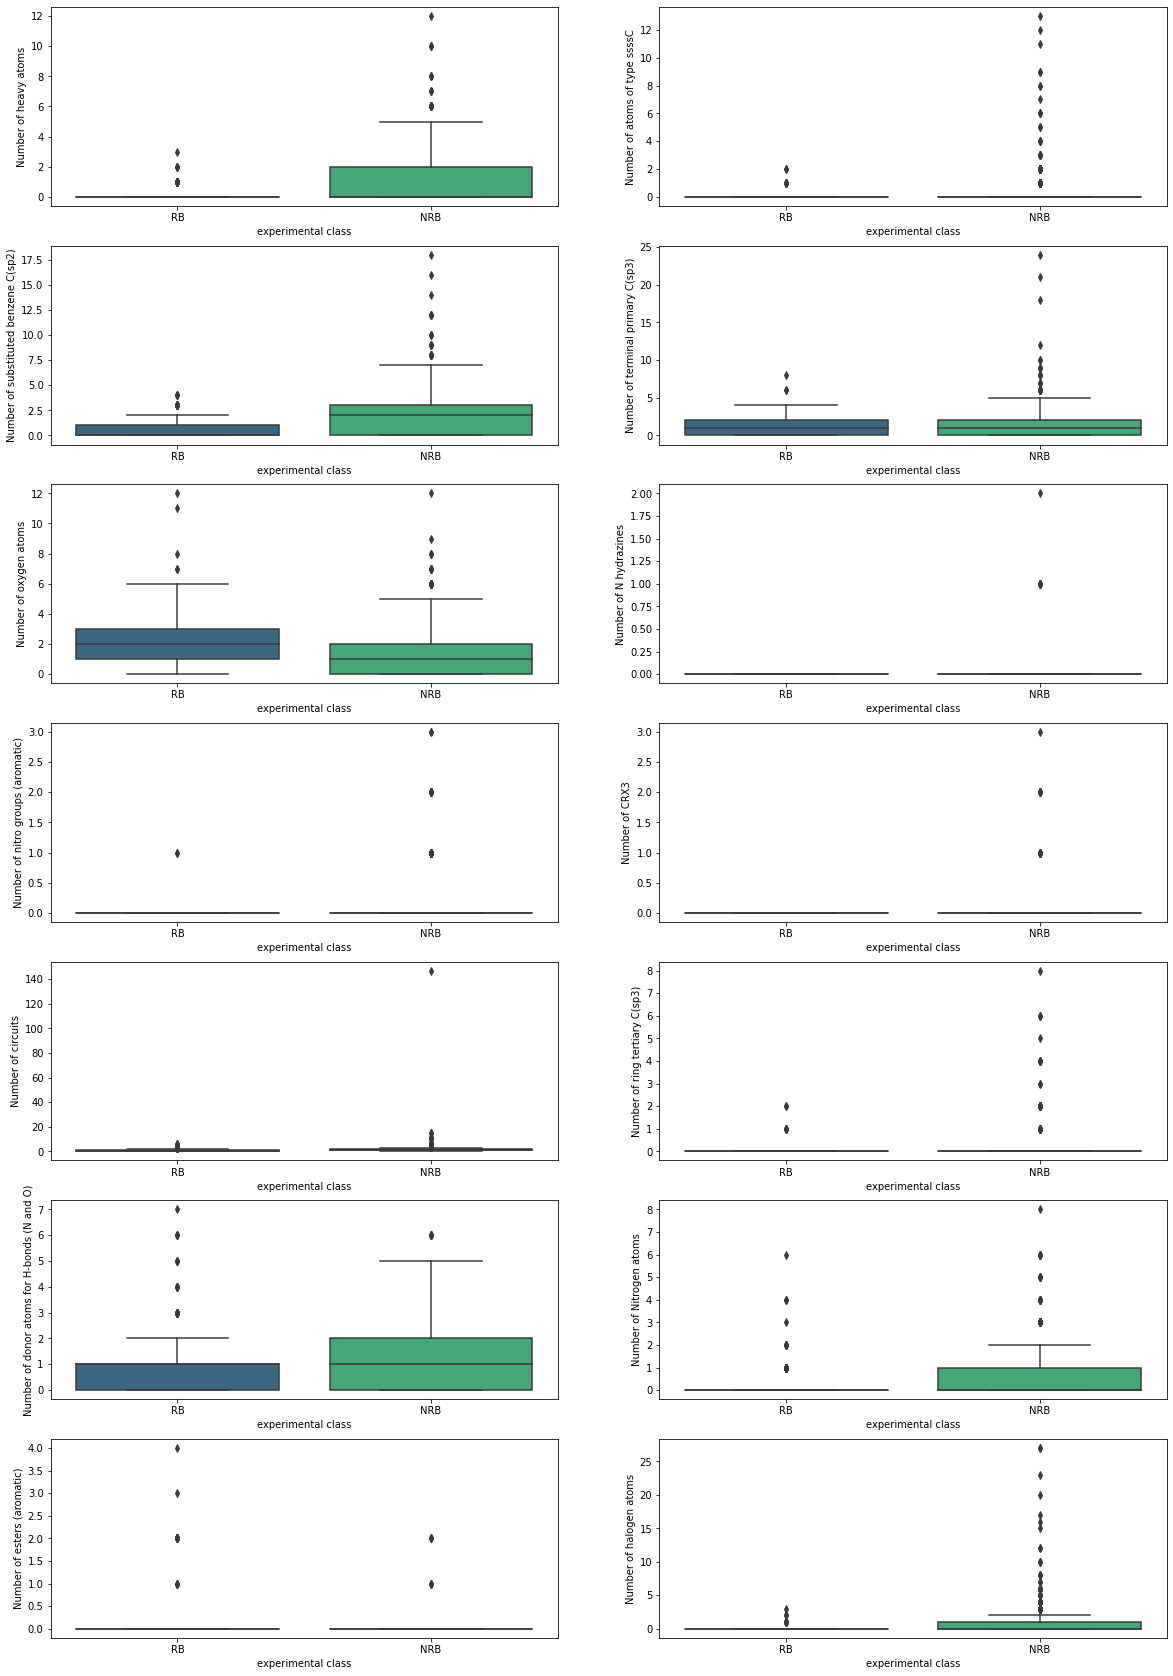

In [21]:
plt.figure(figsize=(20,30))
for i, col in enumerate (Columns_Number):
    plt.subplot(7,2,i+1)
    sns.boxplot(data=df,x='experimental class',y=col,palette='viridis')
    plt.plot()

Concerning the number of atoms, the plots highlight 3 variables that are likely not to interact significantly with the model: 

1)Number of N hydrazines : the curves are superimposed, only the density varies but we explain this by the disparate proportion between the 2 classes.

2)Number of CRX3 : the curves are superimposed

3)Number of donor atoms for H-bonds (N and O) : the curves are nearly superimposed

This is confirmed by their respective boxplots. 

Our first impressions thus seem to be justified on these variables.

In [22]:
len(Columns_Frequency)

5

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

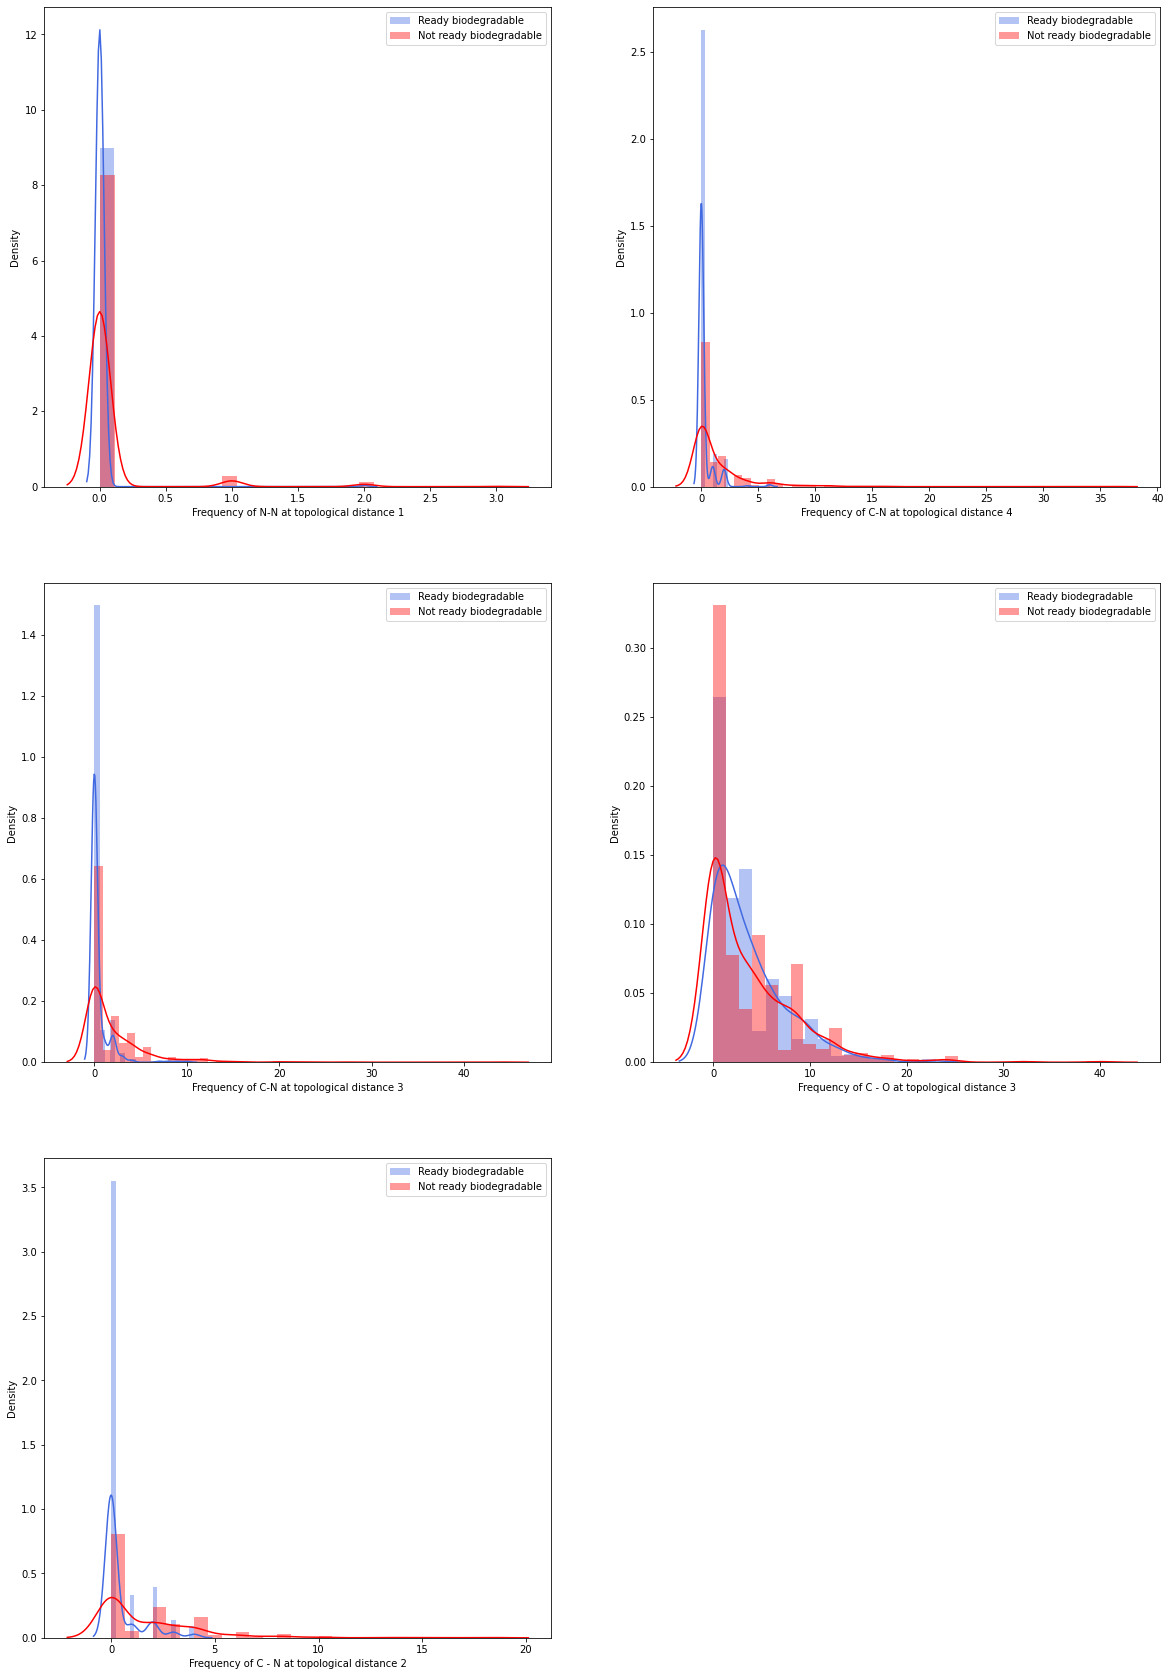

In [23]:
plt.figure(figsize=(20,30))
for i, col in enumerate (Columns_Frequency):
    plt.subplot(3,2,i+1)
    sns.distplot(df_ReadyBio[col], label='Ready biodegradable',color='royalblue')
    sns.distplot(df_NotReadyBio[col], label='Not ready biodegradable',color='red')
    plt.legend()

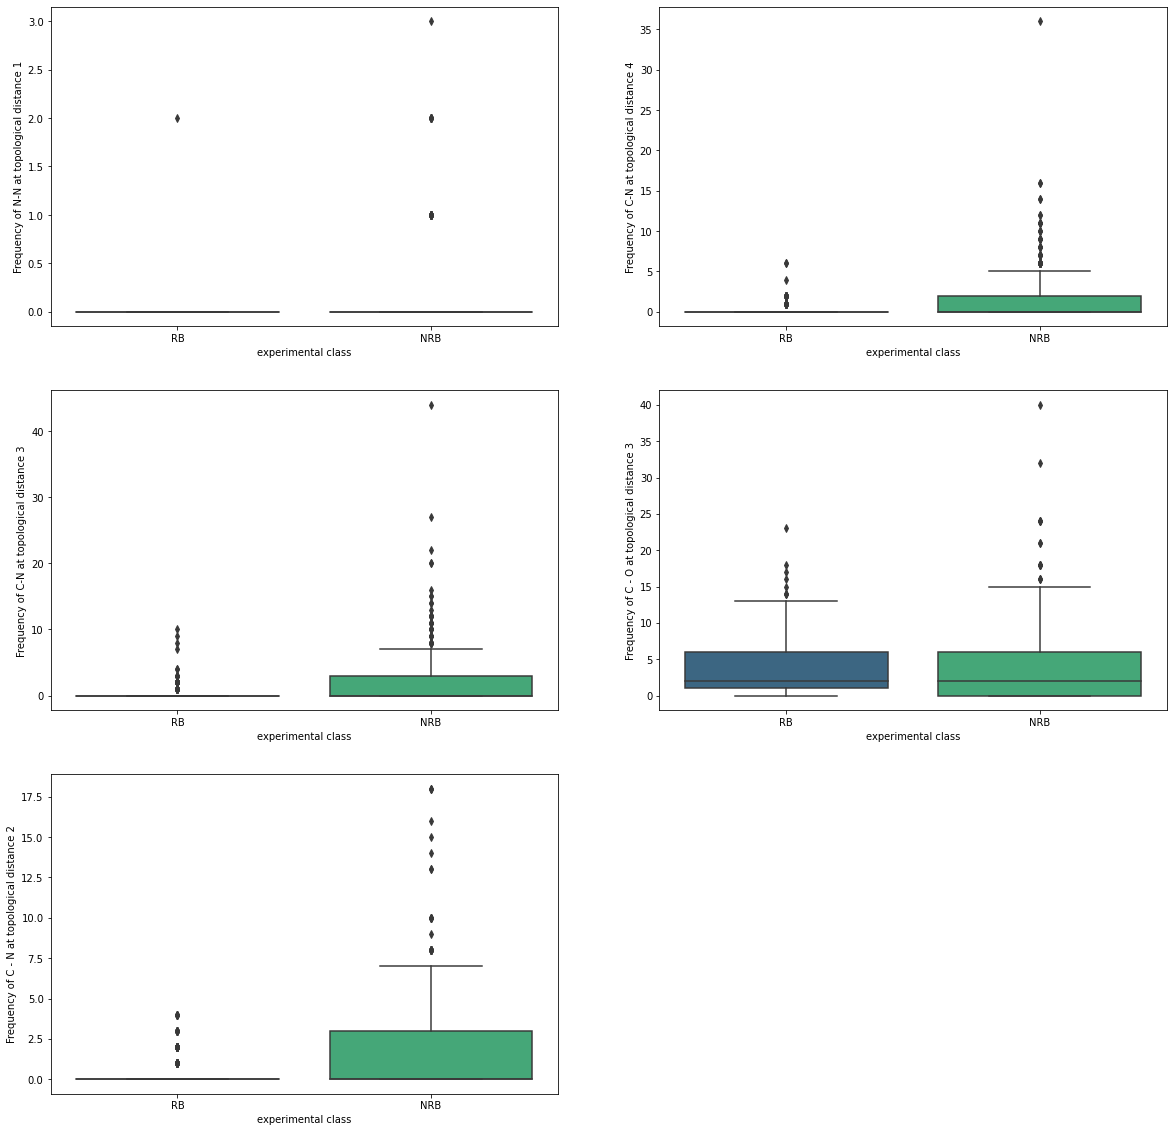

In [24]:
plt.figure(figsize=(20,20))
for i, col in enumerate (Columns_Frequency):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df,x='experimental class',y=col,palette='viridis')
    plt.plot()

Concerning the frequencies of atomic bonds in the topologies of molecules, the plots highlight 1 variable that is likely not to interact significantly with the model: 

Frequency of C - O at topological distance 3 : the curves are nearly superimposed

In addition, this variable was highly correlated with one of the same category: Number of oxygen atoms wich seems to be really significant to the model

We conclude that this variable will probably not interact with the model

In [25]:
len(Columns_Presence)

3

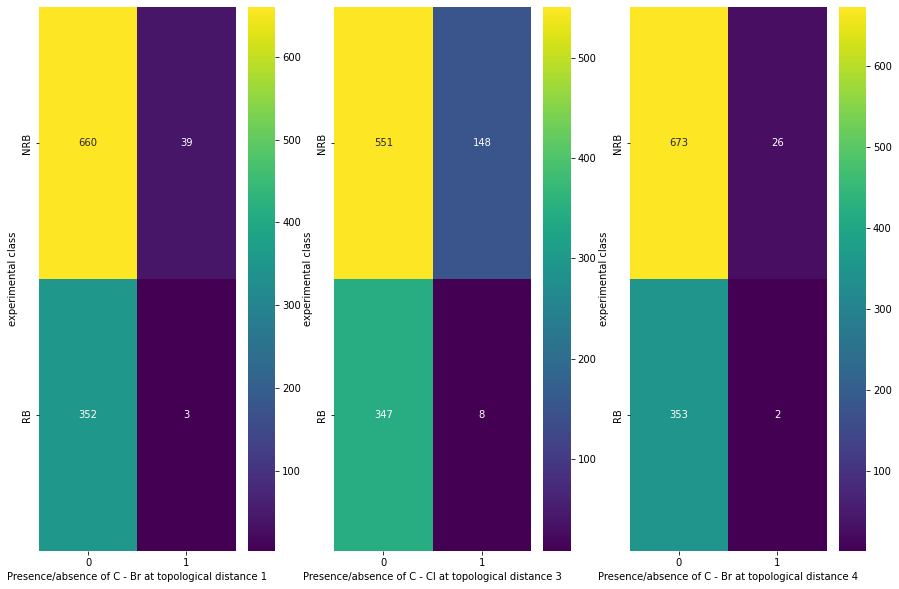

In [26]:

plt.figure(figsize=(15,10))
for i, col in enumerate (Columns_Presence):
    plt.subplot(1,3,i+1)
    sns.heatmap(pd.crosstab(df['experimental class'],df[col]),annot=True,fmt='d',cmap='viridis')
    plt.plot()



/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

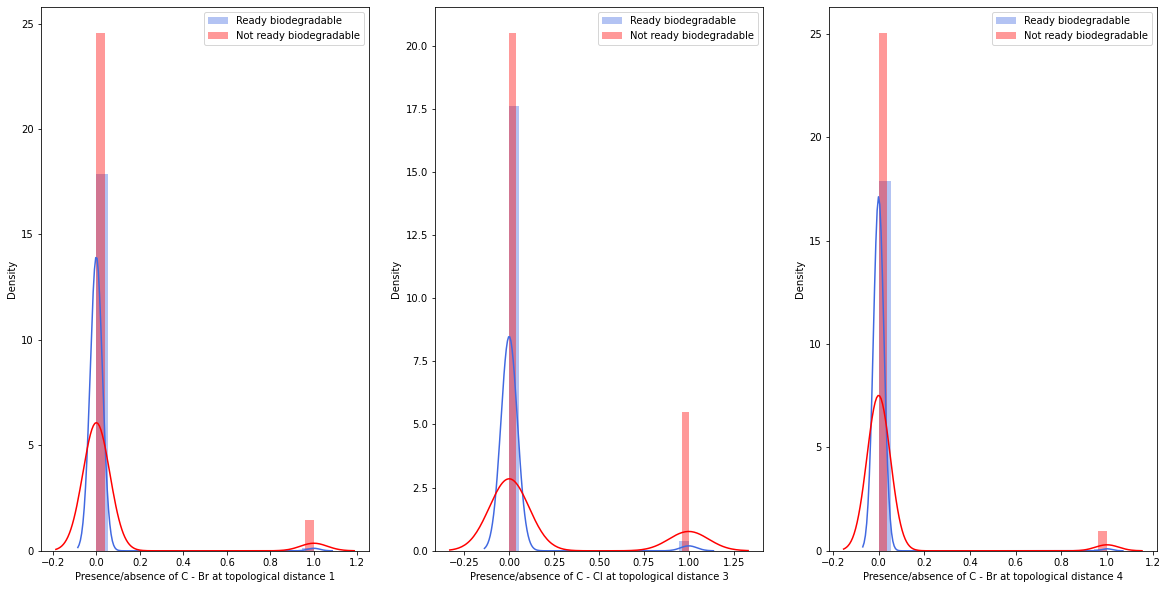

In [27]:
plt.figure(figsize=(20,10))
for i, col in enumerate (Columns_Presence):
    plt.subplot(1,3,i+1)
    sns.distplot(df_ReadyBio[col], label='Ready biodegradable',color='royalblue')
    sns.distplot(df_NotReadyBio[col], label='Not ready biodegradable',color='red')
    plt.legend()

Concerning the presence and absence of atoms in the topologies, the observations on the quality of the variables to influence a model can be a bit more tricky.

Nevertheless, we can observe that in this group 2 variables are really close: Presence/absence of C - Br at topological distance 1 and Presence/absence of C - Br at topological distance 4.

according to the correlation matrix these 2 variables seem to describe the same thing, so we can perhaps predict that one of them will not be influential.


# Preprocessing

Before starting the models, we need to make the data set optimal in order to get the best results. 
We start by converting the experimental class into a numerical variable describing with 1 the biodegradable state and 0 the non biodegradable state. We do this because it will facilitate the import of the results in flask or elsewhere.



In [28]:
df['experimental class'].replace(['RB','NRB'], [1,0], inplace=True)
df.head()

,Leading eigenvalue from Laplace matrix,Balaban-like index from Barysz matrix weighted by Sanderson electronegativity,Number of heavy atoms,Frequency of N-N at topological distance 1,Frequency of C-N at topological distance 4,Number of atoms of type ssssC,Number of substituted benzene C(sp2),Percentage of C atoms,Number of terminal primary C(sp3),Number of oxygen atoms,...,R--CX--R,Frequency of C - N at topological distance 2,Number of donor atoms for H-bonds (N and O),Leading eigenvalue from Burden matrix weighted by mass,Intrinsic state pseudoconnectivity index - type S average,Number of Nitrogen atoms,Spectral moment of order 6 from Burden matrix weighted by mass,Number of esters (aromatic),Number of halogen atoms,experimental class
0,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
1,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
2,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
3,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1
4,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,3.351,2.556,0,7.904,0,0,1


Then, we import the f_classif test and the KBest library in order to perform an anova to eliminate the columns that will have the least influence on the models. We choose to keep 30 variables because it is with this number that we have the best ratio results/compilation time on our models.

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif
y = df['experimental class']
df_Features = df.drop(columns='experimental class')
Best_K_Features = SelectKBest(f_classif, k = 30)
df_Best_Features = Best_K_Features.fit_transform(df_Features, y)
df_Best_Features.shape

(1054, 30)

In [30]:
df_Best_Features = df_Features.iloc[:, Best_K_Features.get_support(True)]
df_Best_Features.columns

Index(['Leading eigenvalue from Laplace matrix', 'Number of heavy atoms',
       'Frequency of N-N at topological distance 1',
       'Frequency of C-N at topological distance 4',
       'Number of atoms of type ssssC', 'Number of substituted benzene C(sp2)',
       'Percentage of C atoms', 'Number of oxygen atoms',
       'Frequency of C-N at topological distance 3', 'Sum of dssC E-states',
       'Hyper-Wiener-like index (log function) from Burden matrix weighted by mass',
       'Lopping centric index',
       'Spectral moment of order 6 from Laplace matrix',
       'Mean first ionization potential (scaled on Carbon atom)',
       'Number of nitro groups (aromatic)',
       'Normalized spectral positive sum from Burden matrix weighted by polarizability',
       'Number of circuits',
       'Presence/absence of C - Br at topological distance 1',
       'Presence/absence of C - Cl at topological distance 3',
       'Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index)',
   

In [31]:
df_Best_Features.head()

,Leading eigenvalue from Laplace matrix,Number of heavy atoms,Frequency of N-N at topological distance 1,Frequency of C-N at topological distance 4,Number of atoms of type ssssC,Number of substituted benzene C(sp2),Percentage of C atoms,Number of oxygen atoms,Frequency of C-N at topological distance 3,Sum of dssC E-states,...,Second Mohar index from Laplace matrix,Number of ring tertiary C(sp3),R--CX--R,Frequency of C - N at topological distance 2,Leading eigenvalue from Burden matrix weighted by mass,Intrinsic state pseudoconnectivity index - type S average,Number of Nitrogen atoms,Spectral moment of order 6 from Burden matrix weighted by mass,Number of esters (aromatic),Number of halogen atoms
0,4.170,0,0,0,0,0,30.8,1,0,0.000,...,1.542,0,0,0,3.315,1.967,0,7.257,0,0
1,3.932,0,0,0,0,0,26.7,4,0,0.000,...,4.891,0,0,0,3.076,2.417,0,7.601,0,0
2,3.000,0,0,0,0,0,20.0,2,0,0.000,...,1.333,0,0,0,3.046,5.000,0,6.690,0,0
3,4.236,0,0,0,0,0,29.4,4,0,-0.271,...,5.588,0,0,0,3.351,2.405,0,8.003,0,0
4,4.236,0,0,0,0,0,28.6,4,0,-0.275,...,4.746,0,0,0,3.351,2.556,0,7.904,0,0


In [32]:
list_difference = []
for element in df.columns:
    if element not in df_Best_Features.columns:
        list_difference.append(element)

print(list_difference)

['Balaban-like index from Barysz matrix weighted by Sanderson electronegativity', 'Number of terminal primary C(sp3)', 'Frequency of C - O at topological distance 3', 'Mean atomic Sanderson electronegativity (scaled on Carbon atom)', 'Number of N hydrazines', 'Number of CRX3', 'Ar2NH / Ar3N / Ar2N-Al / R..N..R', 'Intrinsic state pseudoconnectivity index - type 1d', 'Presence/absence of C - Br at topological distance 4', 'Sum of dO E-states', 'Number of donor atoms for H-bonds (N and O)', 'experimental class']


As can be seen, the variables that were predicted to be less significant for the model were removed by the Anova test. We could have done a chi2 dependency test but we found this method more optimal with the f_classif function. 

Let's do a little dataviz on the columns that got removed to see their distribution

In [33]:
df2_ReadyBio=df2[df2['experimental class']=="RB"]
df2_NotReadyBio=df2[df2['experimental class']=="NRB"]


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

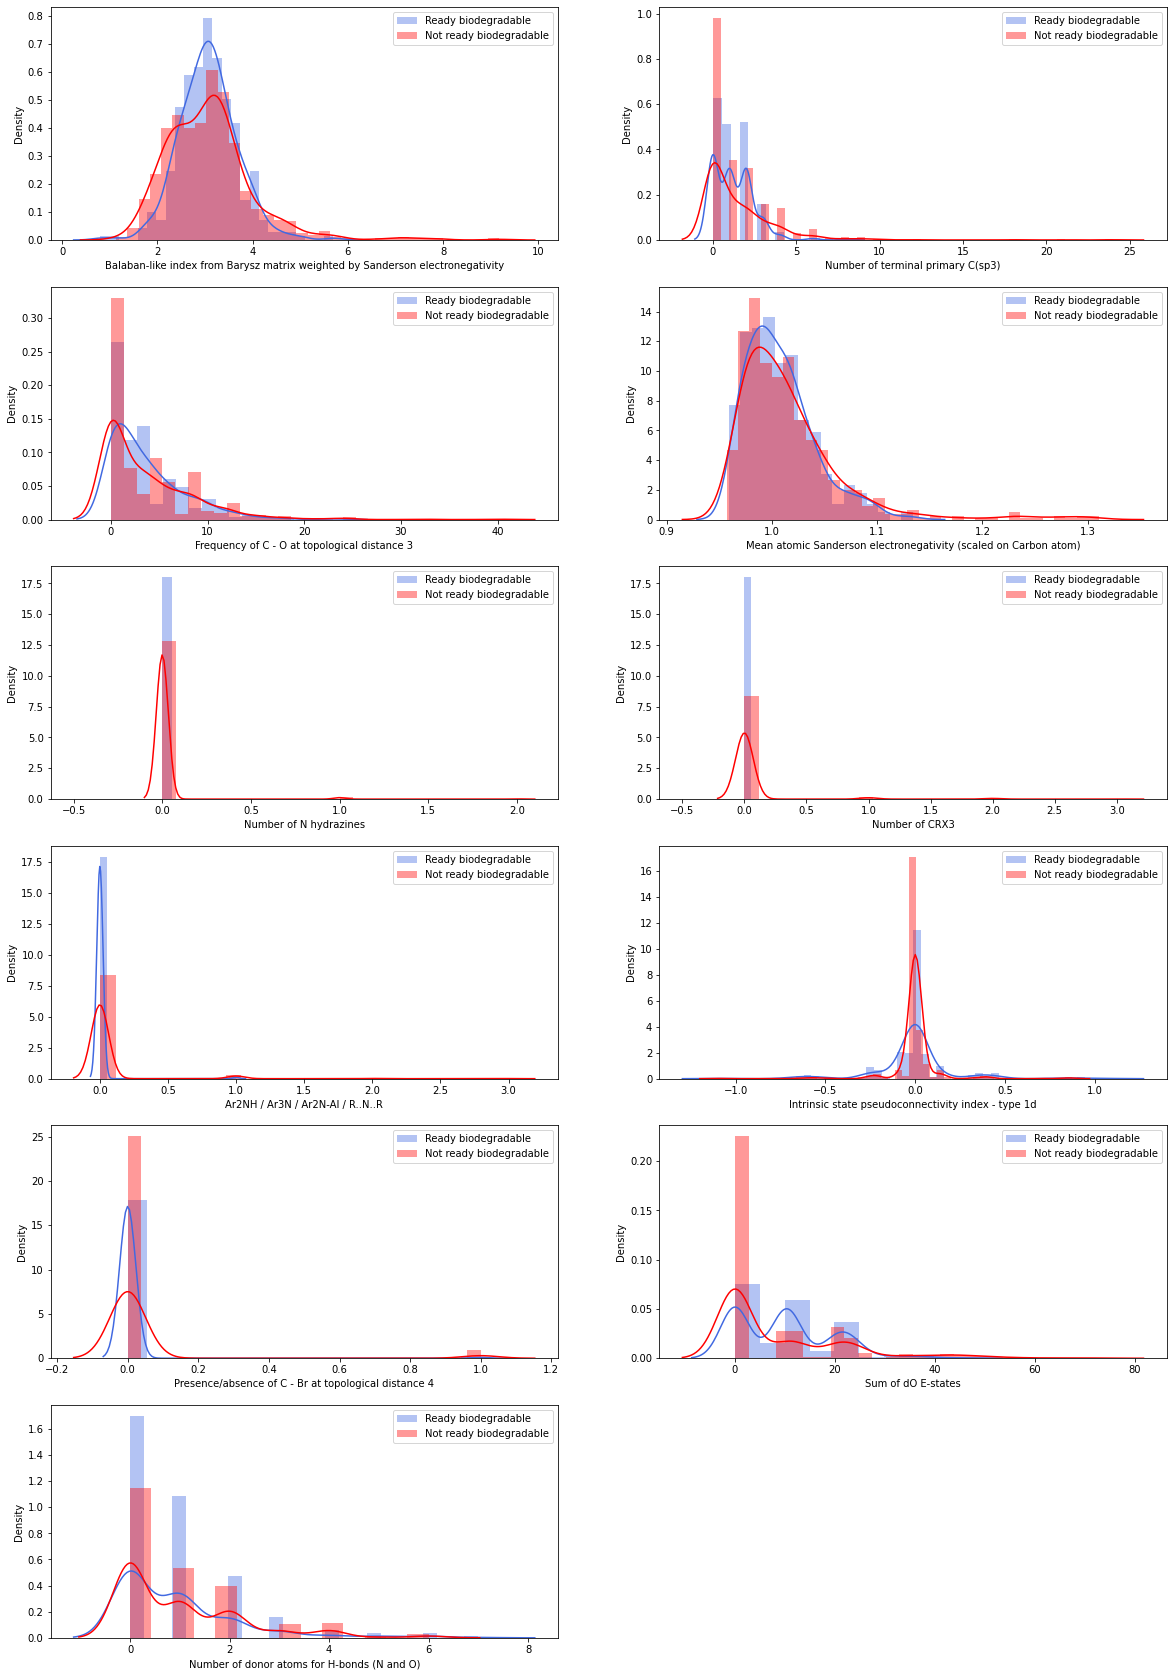

In [34]:
plt.figure(figsize=(20,30))
del list_difference[-1]
for i, col in enumerate (list_difference):
    plt.subplot(6,2,i+1)
    sns.distplot(df2_ReadyBio[col], label='Ready biodegradable',color='royalblue')
    sns.distplot(df2_NotReadyBio[col], label='Not ready biodegradable',color='red')
    plt.legend()

### Scaling the new dataset

In order to gain in accuracy on our models (in our case we have gained on average 4% on each metrics), we propose to scale (normalize) our data. Indeed, although the dataset is built only with numerical variables, some variables are rather categorical (either 0 or 1), float variables with values that tend more towards the extremes (not the same order of magnitude) such as the percentages could therefore influence the model too much.

We chose the StandartScaler over the MinMaxScaler because it is the normalization model with which we had the best results.
We also tested the normalization with make_pipeline at the time of the fit the results were close but a little less good than when we normalized the data as we do below.


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_Features_Scale = scaler.fit_transform(df_Best_Features)
df_Scale_Final = pd.DataFrame(df_Features_Scale, columns = df_Best_Features.columns)
df_Scale_Final.head()

,Leading eigenvalue from Laplace matrix,Number of heavy atoms,Frequency of N-N at topological distance 1,Frequency of C-N at topological distance 4,Number of atoms of type ssssC,Number of substituted benzene C(sp2),Percentage of C atoms,Number of oxygen atoms,Frequency of C-N at topological distance 3,Sum of dssC E-states,...,Second Mohar index from Laplace matrix,Number of ring tertiary C(sp3),R--CX--R,Frequency of C - N at topological distance 2,Leading eigenvalue from Burden matrix weighted by mass,Intrinsic state pseudoconnectivity index - type S average,Number of Nitrogen atoms,Spectral moment of order 6 from Burden matrix weighted by mass,Number of esters (aromatic),Number of halogen atoms
0,-1.123007,-0.490511,-0.166771,-0.420543,-0.270386,-0.74093,-0.684801,-0.453916,-0.461556,0.256375,...,-0.536591,-0.20182,-0.581658,-0.561251,-0.604670,-0.922535,-0.630084,-1.106775,-0.160623,-0.323293
1,-1.558691,-0.490511,-0.166771,-0.420543,-0.270386,-0.74093,-1.133241,1.236640,-0.461556,0.256375,...,1.061324,-0.20182,-0.581658,-0.561251,-0.843872,-0.221680,-0.630084,-0.829638,-0.160623,-0.323293
2,-3.264813,-0.490511,-0.166771,-0.420543,-0.270386,-0.74093,-1.866058,0.109603,-0.461556,0.256375,...,-0.636311,-0.20182,-0.581658,-0.561251,-0.873897,3.801226,-0.630084,-1.563569,-0.160623,-0.323293
3,-1.002188,-0.490511,-0.166771,-0.420543,-0.270386,-0.74093,-0.837927,1.236640,-0.461556,-0.095739,...,1.393885,-0.20182,-0.581658,-0.561251,-0.568639,-0.240370,-0.630084,-0.505774,-0.160623,-0.323293
4,-1.002188,-0.490511,-0.166771,-0.420543,-0.270386,-0.74093,-0.925428,1.236640,-0.461556,-0.100936,...,0.992140,-0.20182,-0.581658,-0.561251,-0.568639,-0.005194,-0.630084,-0.585532,-0.160623,-0.323293


In [36]:
from sklearn.model_selection import train_test_split
seed_num = 10

X_train, X_test, y_train, y_test = train_test_split(df_Scale_Final, y, test_size=0.25, random_state=seed_num)

print(X_train.shape)
print(X_test.shape)

(790, 30)
(264, 30)


# Modeling

We start by testing 10 algorithms with our processed data, we decide to chose all the algorithm that seems to be the more effective according to the UCI and internet.

Then we will try to obtain the best score by doing a Cross-val and a Grid-Search to find the best Hyperparameters.

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [38]:
knn_model = KNeighborsClassifier(n_jobs=-1)
pcpt_model = Perceptron(random_state=seed_num, n_jobs=-1)
lr_model = LogisticRegression(random_state=seed_num, n_jobs=-1)
svc_model = SVC(probability=True, random_state=seed_num)
gnb_model = GaussianNB()
rf_model = RandomForestClassifier(random_state = seed_num, n_jobs=-1)
mlp_model = MLPClassifier(random_state=seed_num)
gbc_model = GradientBoostingClassifier(random_state=seed_num)
ada_model = AdaBoostClassifier(random_state=seed_num)
bag_model = BaggingClassifier(random_state=seed_num, n_jobs=-1)

We chose those metrics : accuracy, recall, precision and the f1 wich are the basic metttrics for classification tasks

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def fit_and_get_performance(algo, X_train, y_train, X_test, y_test):
    
    model = algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    average = (accuracy + precision + recall + f1)/4 
    
    row = [accuracy, precision, recall, f1, average]
    return row

In [40]:
column_names = ['Models', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Average']
Models_Scores = pd.DataFrame(columns = column_names)
Models_Scores_Opti = pd.DataFrame(columns = column_names)

In [41]:
Models = [knn_model, pcpt_model, lr_model,  svc_model, gnb_model, rf_model,  mlp_model, gbc_model, ada_model, bag_model]
Models_Column = ['k-Nearest Neighbors',
              'Perceptron',
              'Logistic Regression', 
              'Support Vector Classifier', 
              'Gaussian Naive Bayes', 
              'Random Forest', 
              'Multi-layer Perceptron Classifier',
              'Gradient Boosting Classifier',
              'AdaBoost Classifier',
              'Bagging Classifier',
             ]

i=0
for model in Models:
    scores = fit_and_get_performance(model, X_train, y_train, X_test, y_test)
    row = [Models_Column[i]] + scores
    Models_Scores.loc[i+1] = row
    i+=1

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [42]:
Models_Scores.sort_values(by='Average', ascending=False)

,Models,Accuracy,Precision,Recall,F1 score,Average
7,Multi-layer Perceptron Classifier,0.920455,0.878049,0.867470,0.872727,0.884675
2,Perceptron,0.890152,0.781250,0.903614,0.837989,0.853251
4,Support Vector Classifier,0.897727,0.850000,0.819277,0.834356,0.850340
3,Logistic Regression,0.886364,0.791209,0.867470,0.827586,0.843157
8,Gradient Boosting Classifier,0.886364,0.819277,0.819277,0.819277,0.836049
9,AdaBoost Classifier,0.882576,0.802326,0.831325,0.816568,0.833199
6,Random Forest,0.886364,0.835443,0.795181,0.814815,0.832951
10,Bagging Classifier,0.878788,0.849315,0.746988,0.794872,0.817491
1,k-Nearest Neighbors,0.852273,0.739130,0.819277,0.777143,0.796956
5,Gaussian Naive Bayes,0.791667,0.606061,0.963855,0.744186,0.776442


## Improve the model by searching for Hyperparameters

We choose to try to update the 4 bests algorithms.

Why ? Because we decide to eliminate those who has a average score below than 0.84.

Running algorithm to find the best parameters take a lot of ressources. 

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### MLP

In [44]:
mlp_model.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [45]:
param_grid =  {
                'hidden_layer_sizes': (100,),
               'alpha': [0.0001, 0.001, 0.00001],
               'tol': [1e-4, 1e-3, 1e-5],
               'batch_size': [200, 300],
               'solver':['adam'],
               'learning_rate':['invscaling', 'adaptive'],
               'activation':['relu'],
               'max_iter':(20,100)
               
               
              }
                                  
grid_mlp = GridSearchCV(mlp_model, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
opti_grid_mlp = grid_mlp.fit(X_train, y_train)
opti_mlp_model = opti_grid_mlp.best_estimator_
opti_grid_mlp.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 200,
 'hidden_layer_sizes': 100,
 'learning_rate': 'invscaling',
 'max_iter': 100,
 'solver': 'adam',
 'tol': 0.001}

In [46]:
scores_opti_mlp = fit_and_get_performance(opti_mlp_model, X_train, y_train, X_test, y_test)
print(scores_opti_mlp)

[0.9204545454545454, 0.8875, 0.8554216867469879, 0.8711656441717791, 0.883635469093328]


### pcpt

In [47]:
pcpt_model.get_params().keys()

dict_keys(['alpha', 'class_weight', 'early_stopping', 'eta0', 'fit_intercept', 'l1_ratio', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [48]:
param_grid = {
              'alpha' : [0.0001, 0.00001, 0.001],              
              'tol': [1e-3, 1e-4, 1e-2],
              'max_iter':(20,100),
              'eta0': [1, 5, 0.1]          
             }
grid_pcpt = GridSearchCV(pcpt_model, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
opti_grid_pcpt = grid_pcpt.fit(X_train, y_train)
opti_pcpt_model = opti_grid_pcpt.best_estimator_
opti_grid_pcpt.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 20, 'tol': 0.01}

In [49]:
scores_opti_pcpt = fit_and_get_performance(opti_pcpt_model, X_train, y_train, X_test, y_test)
print(scores_opti_pcpt)

[0.8257575757575758, 0.7032967032967034, 0.7710843373493976, 0.7356321839080461, 0.7589427000779307]


### SVC

In [50]:
svc_model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [51]:
param_grid =  {'C': [0.1, 1, 5],
               'kernel': ['rbf','linear','poly','sigmoid'],  
               'degree': [3, 2, 4], 
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False],
               'tol': [1e-3, 1e-4, 1e-2],
              }
grid_svc = GridSearchCV(svc_model, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
opti_grid_svc = grid_svc.fit(X_train, y_train)
opti_svc_model = opti_grid_svc.best_estimator_
opti_grid_svc.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


{'C': 5,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'shrinking': True,
 'tol': 0.001}

In [52]:
scores_opti_svc = fit_and_get_performance(opti_svc_model, X_train, y_train, X_test, y_test)
print(scores_opti_svc)

[0.9053030303030303, 0.8452380952380952, 0.8554216867469879, 0.8502994011976047, 0.8640655533714295]


### lr

In [53]:
lr_model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [54]:
param_grid = {
              'tol': [1e-4, 1e-5, 1e-3],
              'C' : [1, 0.1, 5],
              'max_iter' : [100, 50, 200],
              'class_weight': [None, 'balanced'],
              'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
              'multi_class': ['auto', 'ovr', 'multinomial']
             }

grid_lr = GridSearchCV(lr_model, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
opti_grid_lr = grid_lr.fit(X_train, y_train)
opti_lr_model = opti_grid_lr.best_estimator_
opti_grid_lr.best_params_

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "/shared-libs/

{'C': 5,
 'class_weight': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'solver': 'saga',
 'tol': 0.0001}

In [55]:
scores_opti_lr = fit_and_get_performance(opti_lr_model, X_train, y_train, X_test, y_test)
print(scores_opti_lr)

[0.8901515151515151, 0.8, 0.8674698795180723, 0.8323699421965319, 0.8474978342165298]
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


### Presenting the results

In [56]:
Models_Opti = [opti_mlp_model,opti_svc_model,opti_lr_model,opti_pcpt_model]
Models_Opti_Column = ['Multi-layer Perceptron Classifier',
              'Support Vector Classifier',
              'Logistic Regression',
              'Perceptron'
             ]

i=0
for model_opti in Models_Opti:
    scores = fit_and_get_performance(model_opti, X_train, y_train, X_test, y_test)
    row = [Models_Opti_Column[i]] + scores
    Models_Scores_Opti.loc[i+1] = row
    i+=1

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [57]:
Models_Scores_Opti.sort_values(by='Average', ascending=False)

,Models,Accuracy,Precision,Recall,F1 score,Average
1,Multi-layer Perceptron Classifier,0.920455,0.887500,0.855422,0.871166,0.883635
2,Support Vector Classifier,0.905303,0.845238,0.855422,0.850299,0.864066
3,Logistic Regression,0.890152,0.800000,0.867470,0.832370,0.847498
4,Perceptron,0.825758,0.703297,0.771084,0.735632,0.758943


We can observe that the best model remains the MLP although its score did not change with the hyperparameter search. The Multi Layer Perceptron is a rather complicated deeplearning model which can make the hyperparameter search difficult.

The Support Vector Classifier and Logistic Regression models have both improved but are still below the MLP which seems to be the best in our case.

At the bottom of the results we find the Simple Perceptron model because its score went down.


### Confusion matrix with MLP and others models

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Multi-layer Perceptron Classifier
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       181
           1       0.89      0.86      0.87        83

    accuracy                           0.92       264
   macro avg       0.91      0.90      0.91       264
weighted avg       0.92      0.92      0.92       264

Support Vector Classifier
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       181
           1       0.85      0.86      0.85        83

    accuracy                           0.91       264
   macro avg       0.89      0.89      0.89       264
weighted avg       0.91    

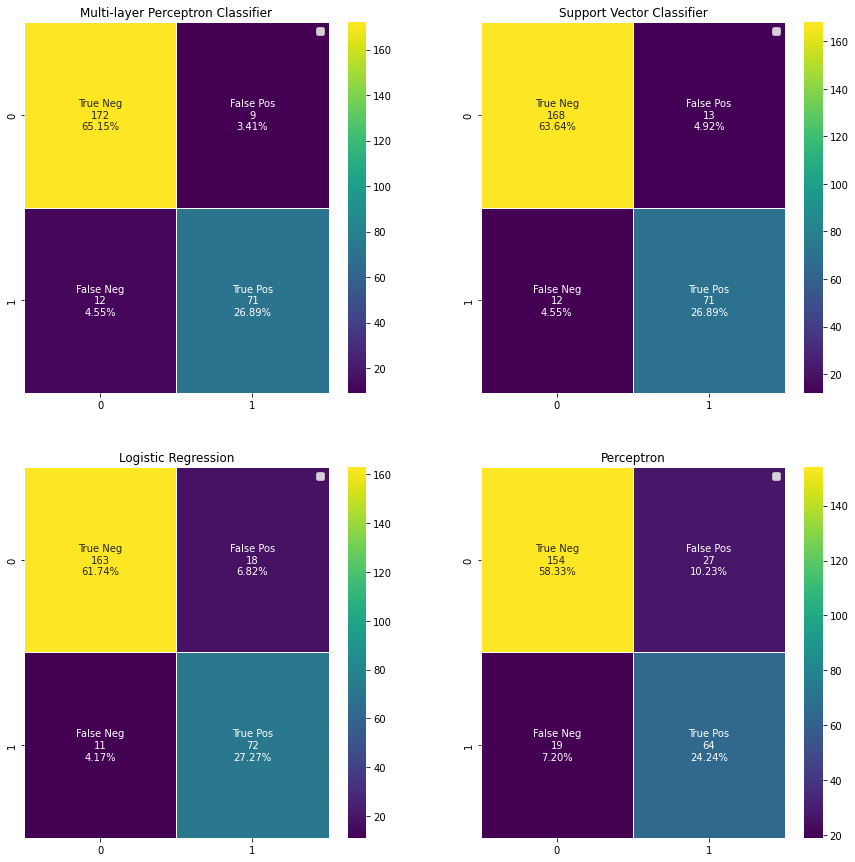

In [67]:

j=0
plt.figure(figsize=(15,15))
for i,model in enumerate (Models_Opti):
    print(Models_Opti_Column[j])
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.subplot(2,2,i+1)
    sns.heatmap(cf_matrix, annot=labels,linewidths=.5, cmap='viridis', fmt='')
    plt.title(Models_Opti_Column[j])
    plt.legend()

    j+=1


# Saving the final model with dump from pickle

Finally, in order to build our Flask webapp we need to save our model in .pkl with pickle to use it on our server.

As we have obtained a better result with normalized data we must also save our scaler model in .pkl in order to normalize the data entered in the App with the .transform() function.

In [61]:
import pickle

ScalerFile='StandartScaler.pkl'
with open(ScalerFile, 'wb') as file:
    pickle.dump(scaler, file)


In [62]:
import pickle

ModelFile='model.pkl'

with open(ModelFile, 'wb') as file:
    pickle.dump(opti_mlp_model, file)

# Conclusion

To conclude, this dataset was very interesting, we enjoyed working on it, studying the different types of variables between them and adopting different strategies in order to achieve the best results on the machine learning models.
We didn't have any previous knowledge on the subject but that didn't prevent us from enjoying it.

In the end, we obtained models with very good scores, especially with the deep learning models that we implemented, although the results of the hyperparameters research allowed a better improvement in the machine learning models such as the logistic regression or the Support Vector Classifier.

As an improvement, we could have perhaps balanced the proportion of Ready Biodegradable and Non Ready Biodegradable in the dataset to get closer to 50/50. We did not do this because the dataset did not contain a lot of data either. We could have perhaps deepened the use of make_pipeline with make_pipeline(scaler, model) in our fit function even if the results obtained with our final preprocessing were less good.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c29108b-5342-4c32-ad46-af0dc11078c4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>